# Gemini


By Alberto Valdes.

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Explanation

Gemini is a multimodal large language model developed by Google DeepMind, which serves as a successor to LaMDA and PaLM. It includes the Gemini Nano, Gemini Pro and Gemini Ultra models.

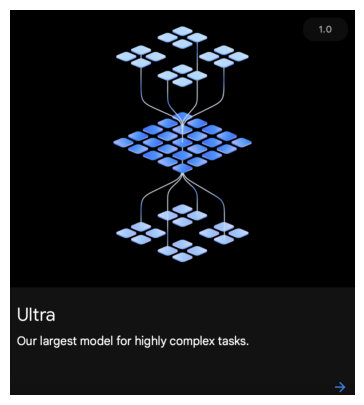

In [4]:
display_img('1.png', 5, 5)

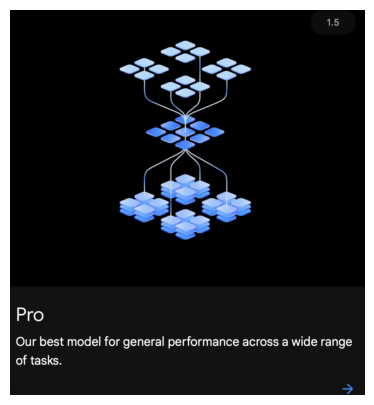

In [5]:
display_img('2.png', 5, 5)

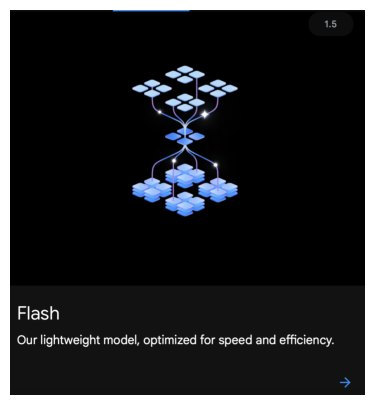

In [6]:
display_img('3.png', 5, 5)

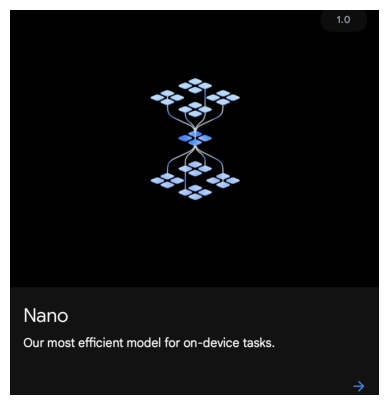

In [7]:
display_img('4.png', 5, 5)

In [8]:
start = time.time()

### i. Install SDK of Google Generative AI

In [9]:
!pip install -q -U google-generativeai

### ii. Import Libraries

In [10]:
import google.generativeai as genai

In [11]:
from google.colab import userdata

In [12]:
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [13]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### iii. Create API Key

**Link:** https://aistudio.google.com/app/apikey

In [14]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [15]:
genai.configure(api_key = GOOGLE_API_KEY)

# 1. Using Gemini Pro

In [16]:
model = genai.GenerativeModel('gemini-pro')

In [17]:
%%time
response = model.generate_content("What is the hapiness?")

CPU times: user 32 ms, sys: 6.65 ms, total: 38.7 ms
Wall time: 2.46 s


In [18]:
print(response.text)

Happiness is a state of well-being and contentment that is often characterized by feelings of joy, love, satisfaction, and fulfillment. It is a positive emotional state that is often associated with positive experiences and outcomes, such as success, good health, and strong relationships. Happiness can be fleeting or long-lasting, and it can be influenced by both internal and external factors.


In [19]:
to_markdown(response.text)

> Happiness is a state of well-being and contentment that is often characterized by feelings of joy, love, satisfaction, and fulfillment. It is a positive emotional state that is often associated with positive experiences and outcomes, such as success, good health, and strong relationships. Happiness can be fleeting or long-lasting, and it can be influenced by both internal and external factors.

# 2. Gemini Pro - Vision

### i. Download an image

In [20]:
!curl -o image.jpg https://www.evoacademy.cl/content/images/2023/12/corgi-en-patineta.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  199k  100  199k    0     0  1681k      0 --:--:-- --:--:-- --:--:-- 1689k


In [21]:
import PIL.Image

In [22]:
img = PIL.Image.open('image.jpg')

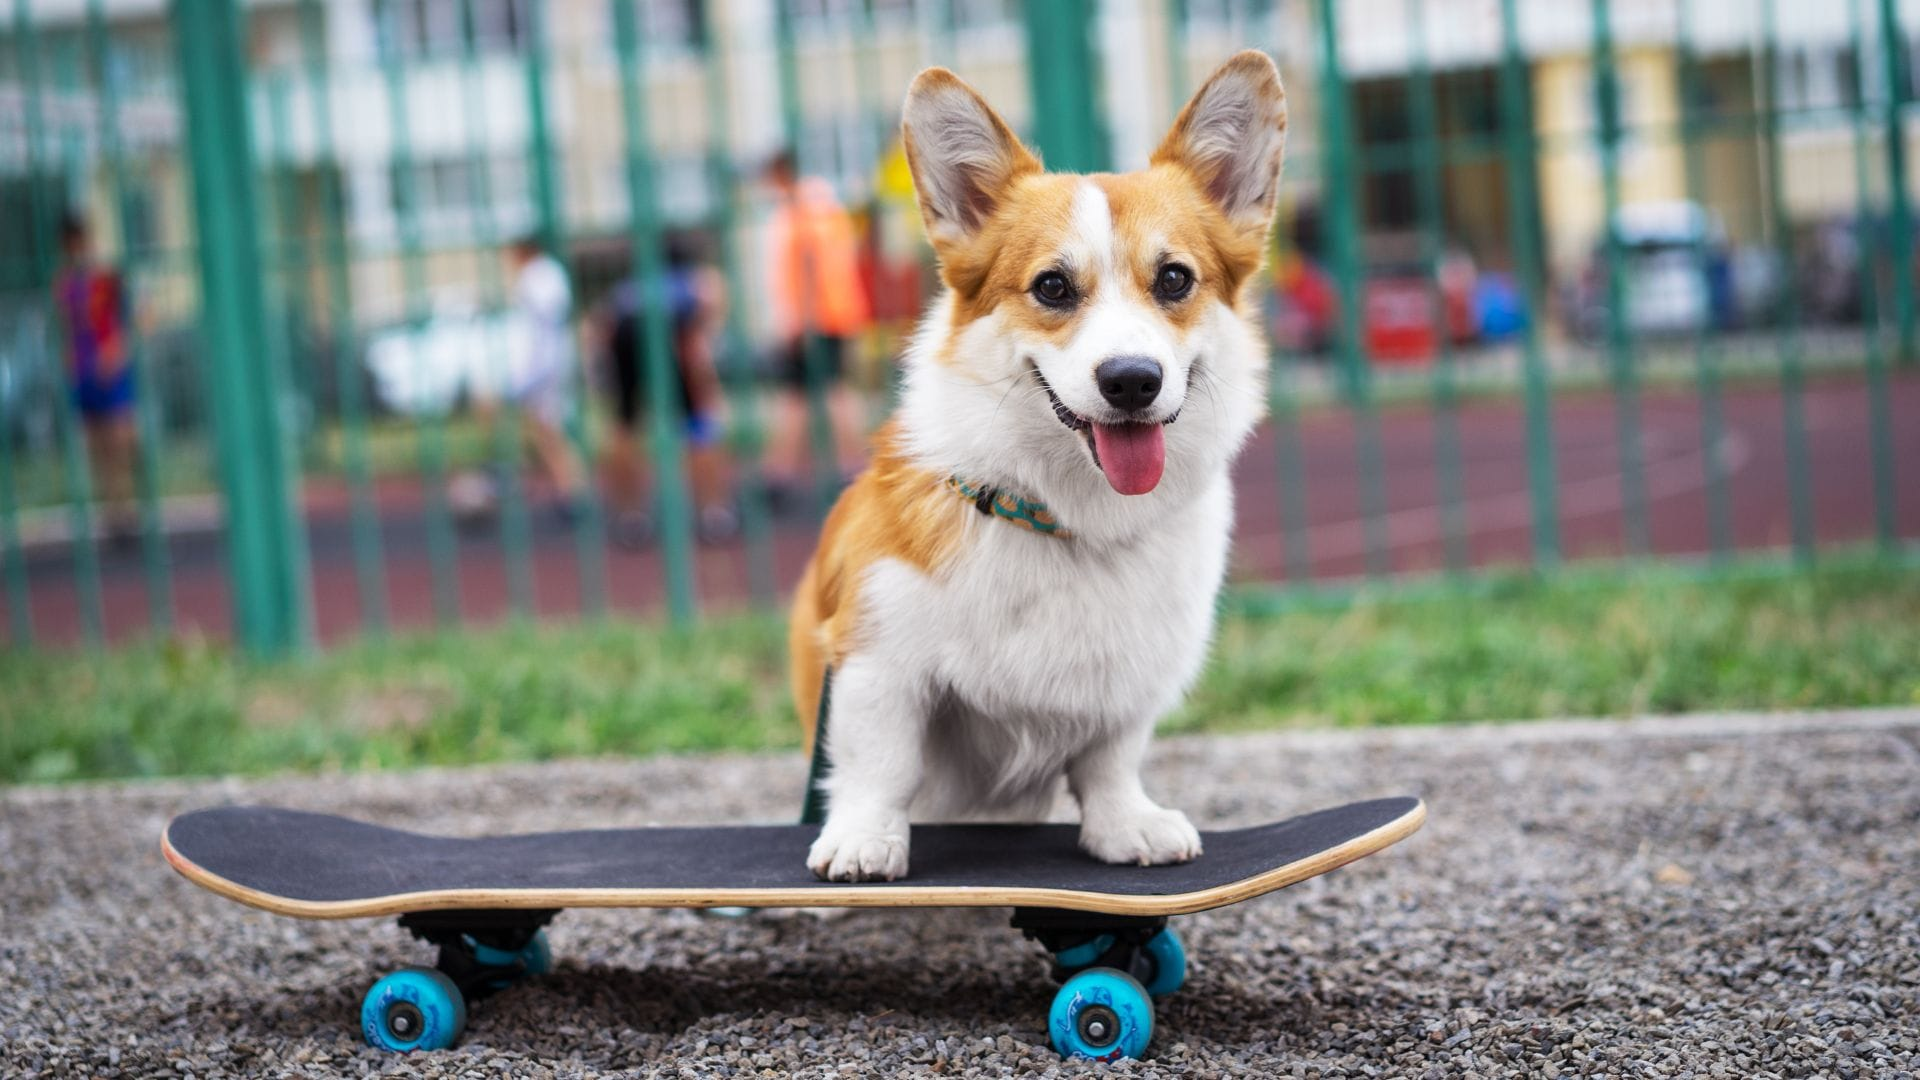

In [23]:
img

In [24]:
model = genai.GenerativeModel('gemini-pro-vision')

In [25]:
%%time
response = model.generate_content(img)
to_markdown(response.text)

CPU times: user 82.7 ms, sys: 15.6 ms, total: 98.3 ms
Wall time: 7.63 s


>  A Pembroke Welsh Corgi sits on a skateboard and looks at the camera with a happy expression on its face.

### ii. Image and text

In [26]:
response = model.generate_content([
    "¿Why is known this animal? It is associated to any country in particular?"
    , img], stream = True)
response.resolve()

to_markdown(response.text)

>  The image shows a Corgi, a breed of dog that originated in Wales. They are known for their short legs and long bodies, and are often associated with the royal family of the United Kingdom, as they have been a favorite breed of the royal family for many years.

### iii. Analizing two images

In [27]:
!curl -o img1.jpg https://www.evoacademy.cl/content/images/2023/12/7.jpg
!curl -o img2.jpg https://www.evoacademy.cl/content/images/2023/12/8.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10606  100 10606    0     0   114k      0 --:--:-- --:--:-- --:--:--  115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7580  100  7580    0     0  84421      0 --:--:-- --:--:-- --:--:-- 84222


In [28]:
img1 = PIL.Image.open('img1.jpg')
img2 = PIL.Image.open('img2.jpg')

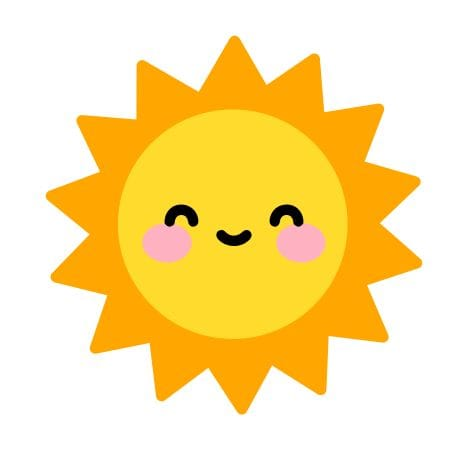

In [29]:
img1

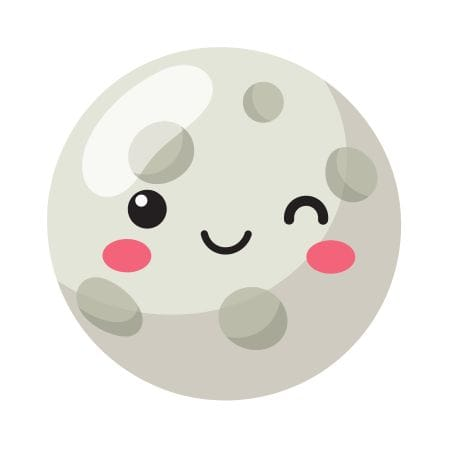

In [30]:
img2

In [31]:
%%time
response = model.generate_content([
    "What is the relation between the two images? Describe each of them and then describe the relation"
    , img1, img2])
response.resolve()

to_markdown(response.text)

CPU times: user 40.9 ms, sys: 15.6 ms, total: 56.5 ms
Wall time: 5.94 s


>  The first image is of a smiling sun with a face. It has yellow color and several triangular rays. The second image is of a smiling moon with a face. It has a grey color and several craters. The relation between the two images is that they are both celestial bodies. The sun is a star, while the moon is a satellite of the Earth. The sun is much larger than the moon and is the source of light and heat for the Earth. The moon reflects the light of the sun and is visible from the Earth at night.

# 3. Langchain

### i. Text

In [32]:
!pip install -q langchain

In [33]:
!pip install -q langchain-google-genai

In [34]:
!pip install -q google-generativeai

In [35]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [36]:
llm = ChatGoogleGenerativeAI(model = "gemini-pro", google_api_key = GOOGLE_API_KEY)
response = llm.invoke("Write a 5 line poem on AI")

In [37]:
print(response.content)

Code's intricate dance,
A mind without a face,
Learning, adapting,
Augmenting human grace,
AI's potential, boundless in space.


In [38]:
batch_responses = llm.batch(
    [
        "Who is the President of USA?",
        "What are the three capitals of South Africa?",
        "Who is the best player of the world?"
    ]
)

In [39]:
for response in batch_responses:
    print(response.content)

Joe Biden
- Pretoria (executive capital)
- Cape Town (legislative capital)
- Bloemfontein (judicial capital)
Lionel Messi


### ii. Text and Image

In [40]:
from langchain_core.messages import HumanMessage

In [41]:
llm = ChatGoogleGenerativeAI(model = "gemini-pro-vision", google_api_key = GOOGLE_API_KEY)

In [42]:
!curl -o img_lang_chain.jpg https://picsum.photos/seed/all/300/300

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [43]:
img_lang_chain = PIL.Image.open('image_lc.jpg')

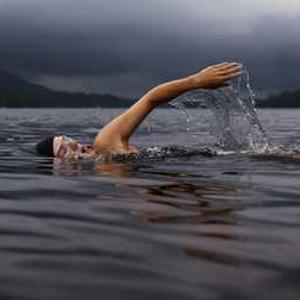

In [44]:
img_lang_chain

In [45]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Describe the image in a single sentence?",
        },
        {
            "type": "image_url",
            "image_url": "https://picsum.photos/seed/all/300/300"
        },


    ]
)

In [46]:
response = llm.invoke([message])

In [47]:
print(response.content)

 A person is swimming in a lake.


### Time of execution

In [48]:
end = time.time()

In [49]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 54 seconds.
